## Importing Libraries

In [1]:
import numpy as np    # For array operations
import pandas as pd   # for storing pts in dataframe
import matplotlib.pyplot as plt   # for plotting Triangulated polygon
import random    # for random points generation
import math  # for math operation

# 1. Generate Random Points

In [2]:
def generate(n,seed_num):  # generates random integers in range [1,1000]
    np.random.seed(seed_num)
    return [list(x) for x in np.random.randint(1,1000,size=(n,2))] 

def generate2(n=5):    # Generates point in circular area of r=500
    lst=[]
    for i in range(n):
        theta=2*math.pi*random.random()
        r=np.random.randint(1,500)+np.random.randint(1,500)
        lst.append([r*np.cos(theta),r*np.sin(theta)])    
    return lst    

def find_angle(p1,p2,p3):
    a=np.array([p1[0]-p2[0],p1[1]-p2[1]])
    b=np.array([p3[0]-p2[0],p3[1]-p2[1]])    
    inner = np.inner(a, b)
    norms = np.linalg.norm(a) * np.linalg.norm(b)

    cos = inner / norms
    rad_angle = np.arccos(np.clip(cos, -1.0, 1.0))
    deg_angle = np.rad2deg(rad_angle)
    if cos>0 and p1[1]>p2[1]:
        deg_angle=deg_angle
    elif cos>0 and p1[1]<p2[1]:
        deg_angle=-deg_angle    
    elif cos<0 and p1[1]>p2[1]:
        deg_angle=deg_angle      
    elif cos<0 and p1[1]<p2[1]:
          deg_angle=360-deg_angle     
    return deg_angle  

def sort_cyclic(lst):
    x_mid,y_mid=0,0
    for pt in lst:
        x_mid+=pt[0]
        y_mid+=pt[1]
    x_mid/=len(lst)
    y_mid/=len(lst)
    output=[]
    for pt in lst:
        p1=pt
        p2=x_mid,y_mid
        p3=[p2[0]+100,p2[1]]  
        deg_angle=find_angle(p1,p2,p3)
        output.append([deg_angle,pt])
    return [i[1] for i in sorted(output)]  

n=5                          # Enter (n=number of sides) to generate list of n points in Anticlockwise order          
pts=sort_cyclic(generate(n,42))
print(f'points={pts}')

points=[[701, 21], [615, 122], [861, 271], [103, 436], [107, 72]]


# 2. Utility Functions

In [3]:
def PLOT(pts,hull_pts,xlim=0,ylim=1000):          # PLOTTING FUNCTION TO DISPLAY POLYGONS AND TRIANGULATED POLYGONS
    pts.append(pts[0])
    hull_pts.append(hull_pts[0])
    x=[pt[0] for pt in pts]
    y=[pt[1] for pt in pts]
    X=[pt[0] for pt in hull_pts]
    Y=[pt[1] for pt in hull_pts]
    fig, (ax2, ax3) = plt.subplots(1,2,figsize=(16,6), constrained_layout=True)   # plotting 3 images side by side
    #ax1.title.set_text(f'Scatter Plot {len(x)-1} Pts')
    ax2.title.set_text(f'{len(x)-1} sided Polygon')   
    ax3.title.set_text(f'{len(hull_pts)-1} sided Convex Hull')  
    plt.figure(figsize=(8,8))
    #ax1.scatterplot(x,y,'black')
    ax2.plot(x,y,'black',label='Polygon Vertices',lw=2,marker='o',markersize=8,markerfacecolor='red')
    ax3.plot(X,Y,'black',label='Convex Hull Vertices',lw=2,marker='o',markersize=8,markerfacecolor='red')
    ax2.set_xlim(xlim,ylim)
    ax2.set_ylim(xlim,ylim)
    ax3.set_xlim(xlim,ylim)
    ax3.set_ylim(xlim,ylim)
    ax2.grid()
    ax3.grid()
    ax2.legend()# according to legend
    ax3.legend() 
   
def convert_to_df(pts):
    x = [i[0] for i in pts]
    y = [i[1] for i in pts]
    df = pd.DataFrame({'x': x, 'y': y})
    return df  


def left_on(edge,outer):    # To check if point lies on left side wrt edge or not
    a=np.array(edge[1])-np.array(edge[0])
    b=np.array(outer)-np.array(edge[0])
    if np.cross(a,b)>0:    # using left on check
        return 1
    else:
        return 0  

def get_edges(pts):    # form list of all edges in anticlock wise order
    res=[]
    res2=[]
    for i in range(len(pts)):
        if i==0:
            res.append((pts[len(pts)-1][0],pts[len(pts)-1][1],pts[0][0],pts[0][1]))  
            res2.append([pts[len(pts)-1],pts[0]])
        elif i!=0: 
            res.append((pts[i-1][0],pts[i-1][1],pts[i][0],pts[i][1]))
            res2.append([pts[i-1],pts[i]])
    output=pd.DataFrame(res,columns=['x','y','xend','yend']) 
    return res2,output

# 3. Incremental Algorithm Function

In [4]:
def Incremental(Hull_pts,pts):
    while pts!=[]:
        Hull_edges,_=get_edges(Hull_pts)   
        check_pt=pts[0]
        test_result=[]
        for edge in Hull_edges:
            test_result.append(left_on(edge,check_pt))   
        tangent_pts=[]   
        #print(f'test result={test_result}')           
        for i in range(len(test_result)):
            if i!=len(test_result)-1 and ((test_result[i]==0 and test_result[i+1]==1) or (test_result[i]==1 and test_result[i+1]==0)):
                tangent_pts.append(Hull_edges[i+1][0]) 
            if i==len(test_result)-1 and ((test_result[i]==0 and test_result[0]==1) or (test_result[i]==1 and test_result[0]==0)):  
                tangent_pts.append(Hull_edges[0][0])    
          
        if tangent_pts!=[]:         
            if left_on(tangent_pts,check_pt)==0:
                tangent_pt1=tangent_pts[0]  
                tangent_pt2=tangent_pts[1]
            else:
                tangent_pt1=tangent_pts[1]  
                tangent_pt2=tangent_pts[0]
            #print(f"tangent_pt 1={tangent_pt1} and tangent_pt 2={tangent_pt2}")        
            index_Tangent1,index_Tangent2=0,0
            for i,hull_pt in enumerate(Hull_pts):
                if hull_pt==tangent_pt1:
                    index_Tangent1=i
                if hull_pt==tangent_pt2:
                    index_Tangent2=i
            if index_Tangent1<index_Tangent2:
                Hull_pts=Hull_pts[:index_Tangent1+1]+[check_pt]+Hull_pts[index_Tangent2:]
            else:
                Hull_pts=Hull_pts[index_Tangent2:index_Tangent1+1]+[check_pt] 
        #print(f"hull pts={Hull_pts}")        
        pts.remove(check_pt)                                    
    return sort_cyclic(Hull_pts)      

# 4. Display Results

In [9]:
def generator(n,seed_num=42,flag=0):    # For generating results and plotting---------Input (n)---Number of random points to be generated
    if flag==0:
        pts=sort_cyclic(generate(n,seed_num))
    elif flag==1:
        pts=sort_cyclic(generate2(n))  
    #print('pts=',pts)
    hull_pts=Incremental(pts[:3],pts[3:])  
    if flag==0: 
        PLOT(pts,hull_pts)
    elif flag==1:
        PLOT(pts,hull_pts,-1000,1000)  

## 4.1) N<35 cases

In [ ]:
for i in range(10,36,5):
    generator(i)

## 4.2). 50<=N<=250 Cases

In [ ]:
for i in range(50,251,50):
    generator(i)

## 4.3). N=10000 Case

In [ ]:
generator(10000,flag=1)

## 4.4). N=100000 Case

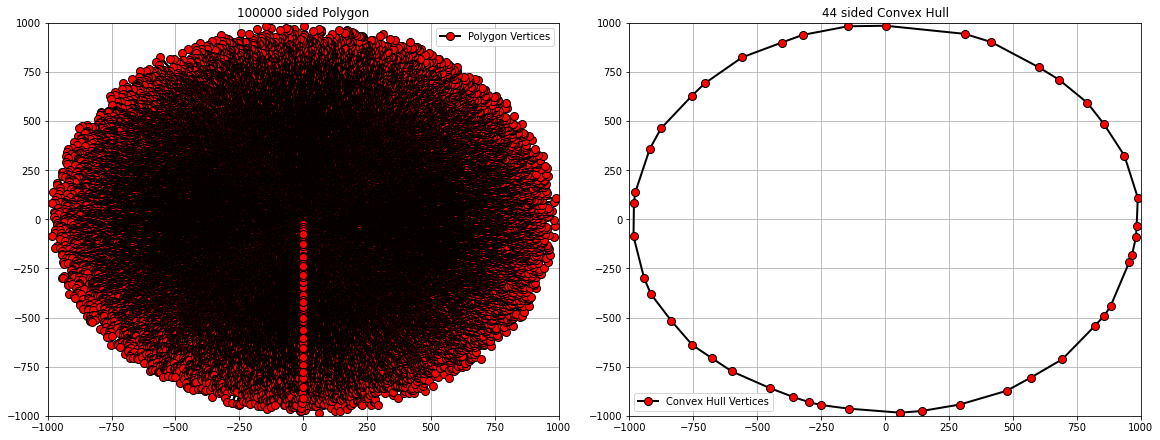

<Figure size 576x576 with 0 Axes>

In [ ]:
generator(100000,flag=1)